<a href="https://colab.research.google.com/github/Omarnot2far/football_data_analysis/blob/main/Shot_and_Pass_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# World Cup Final Argentina vs France
Shot and Pass Map

In [ ]:
pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
#importing necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen

In [ ]:
parser = Sbopen()

In [ ]:
competetion = parser.competition()

In [ ]:
competetion['competition_name'].unique()

array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [ ]:
competetion.loc[competetion['competition_name'] =='FIFA World Cup']

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
29,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-06-11T11:30:50.462448,2024-06-11T11:30:50.462448,2024-05-15T10:23:32.854925
30,43,3,International,FIFA World Cup,male,False,True,2018,2024-06-12T07:38:19.345758,2021-06-13T16:17:31.694,None,2024-06-12T07:38:19.345758
31,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929
32,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530
33,43,51,International,FIFA World Cup,male,False,True,1974,2024-02-13T02:52:29.582599,2021-06-13T16:17:31.694,None,2024-02-13T02:52:29.582599
34,43,272,International,FIFA World Cup,male,False,True,1970,2024-02-13T14:23:06.735299,None,None,2024-02-13T14:23:06.735299
35,43,270,International,FIFA World Cup,male,False,True,1962,2023-06-26T10:38:00.323984,None,None,2023-06-26T10:38:00.323984
36,43,269,International,FIFA World Cup,male,False,True,1958,2024-02-13T14:22:08.222297,None,None,2024-02-13T14:22:08.222297


In [ ]:
df_match = parser.match(competition_id=43, season_id=106)
df_match.head()

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,...,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,...,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-06-20 11:04:37.638969,3,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-06-24 17:17:27.911026,2023-07-11 14:56:31.096588,1,...,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany


In [ ]:
df_match['competition_stage_name'].unique()

array(['Group Stage', 'Round of 16', 'Quarter-finals', 'Final',
       '3rd Place Final', 'Semi-finals'], dtype=object)

In [ ]:
df_match.loc[df_match['competition_stage_name'] == 'Final']

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
9,3869685,2022-12-18,2022-12-18 17:00:00,3,3,available,available,2023-02-20 07:27:19.374380,2023-08-17 15:55:15.164685,7,...,26,Final,1001114,Lusail Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland


In [ ]:
df, related, freeze, tactics = parser.event(3869685)

In [ ]:
df.head()

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_id,foul_committed_card_name,ball_recovery_offensive,shot_one_on_one,foul_committed_advantage,foul_won_advantage,block_offensive,foul_committed_offensive,bad_behaviour_card_id,bad_behaviour_card_name
0,0584ee21-e3dd-4d9f-95a0-5b5e84be25c3,1,1,00:00:00,0,0,1,0.000000,3869685,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b32679f8-942e-4122-96a2-015caf75e628,2,1,00:00:00,0,0,1,0.000000,3869685,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,954f6855-de22-46a2-8d09-6fe94eec2b9b,3,1,00:00:00,0,0,1,0.000000,3869685,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6404a8e8-afaf-489d-b65e-173a237ffed5,4,1,00:00:00,0,0,1,0.000000,3869685,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f651a6c4-55e3-4e0f-a178-59414ba83d6a,5,1,00:00:00.578000,0,0,2,0.975702,3869685,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#get team names
team1, team2 = df.team_name.unique()

In [ ]:
team1

'Argentina'

In [ ]:
team2

'France'

In [ ]:
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

In [ ]:
# a data frame before 120 minutes

shots_before_120 = shots[shots['minute'] < 120]


# the shot map
this shot map include the panalty shots

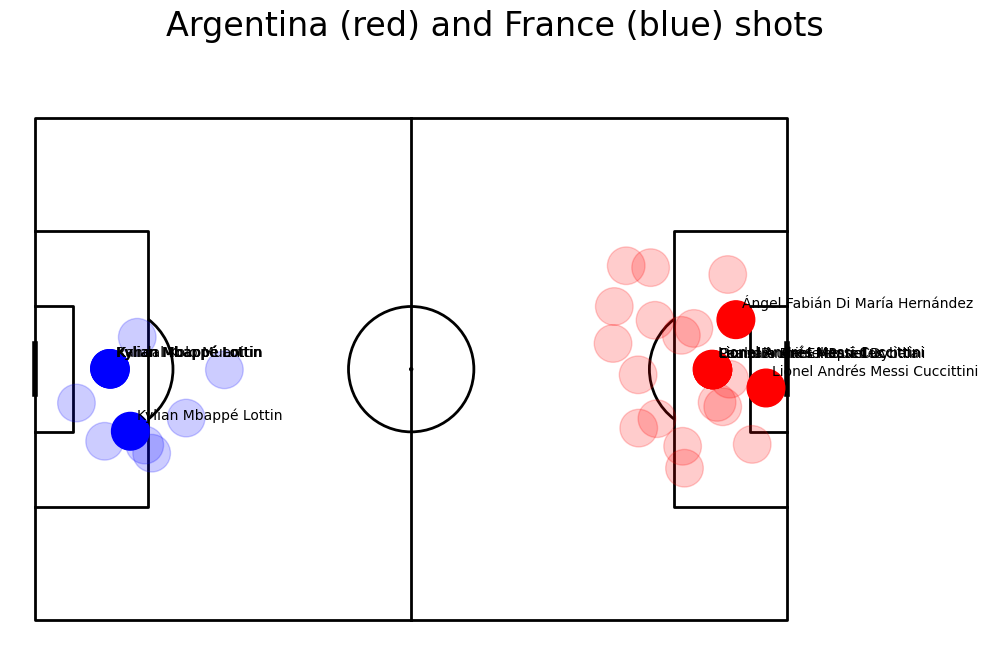

In [ ]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=3
    #plot Argentina
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot France
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Argentina (red) and France (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

# shots_before_120_minutes
this shot map without the panalty shot

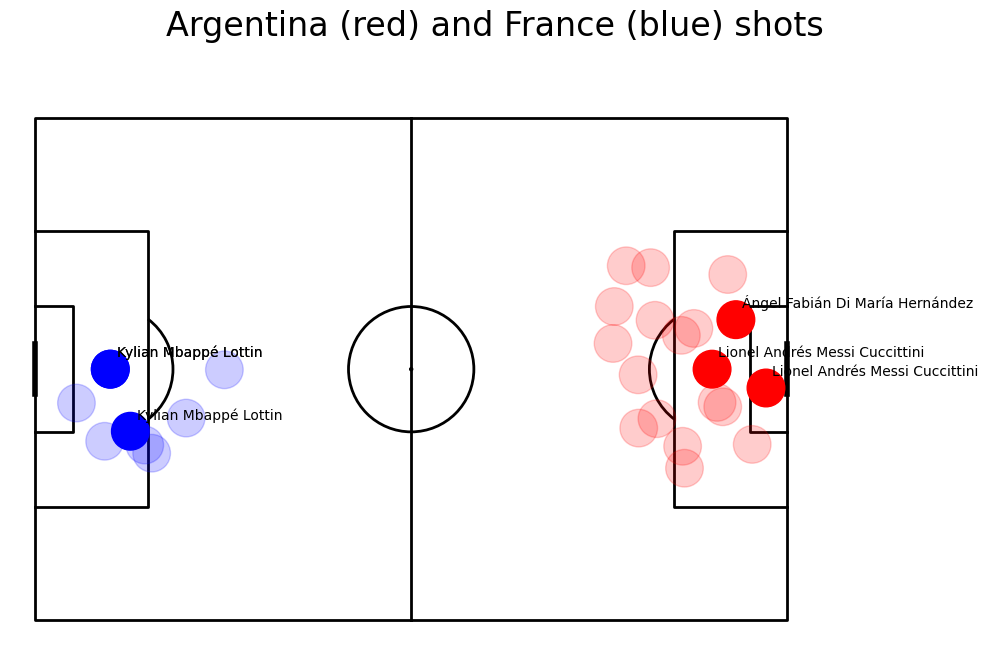

In [ ]:
pitch = Pitch(line_color = "black")
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots_before_120.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=3
    #plot Argentina
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_name'])
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot France
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_name'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Argentina (red) and France (blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
plt.show()

data frame for both team

In [ ]:
#query
mask_argentina = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_argentina = df.loc[mask_argentina, ['x', 'y', 'outcome_name', "player_name"]]

In [ ]:
df_argentina

,x,y,outcome_name,player_name
191,92.4,30.0,Saved,Alexis Mac Allister
339,99.2,47.9,Blocked,Rodrigo Javier De Paul
601,103.1,34.6,Off T,Ángel Fabián Di María Hernández
770,108.0,40.0,Goal,Lionel Andrés Messi Cuccittini
978,94.3,23.5,Wayward,Alexis Mac Allister
1177,111.8,32.1,Goal,Ángel Fabián Di María Hernández
1916,103.3,52.3,Saved,Rodrigo Javier De Paul
2204,110.5,24.9,Saved,Julián Álvarez
2235,109.7,46.0,Off T,Lionel Andrés Messi Cuccittini
2691,98.9,32.2,Saved,Enzo Fernandez


In [ ]:
#query
mask_france = (df.type_name == 'Shot') & (df.team_name == team2)
#finding rows in the df and keeping only necessary columns
df_france = df.loc[mask_france, ['x', 'y', 'outcome_name', "player_name"]]

In [ ]:
df_france

,x,y,outcome_name,player_name
2517,113.4,34.6,Off T,Randal Kolo Muani
2658,102.5,27.9,Off T,Kylian Mbappé Lottin
2928,108.0,40.0,Goal,Kylian Mbappé Lottin
2987,104.8,30.1,Goal,Kylian Mbappé Lottin
3257,95.9,32.2,Blocked,Kylian Mbappé Lottin
3283,108.9,28.5,Saved,Adrien Rabiot
3802,89.8,39.9,Blocked,Youssouf Fofana
4198,101.4,26.6,Blocked,Kylian Mbappé Lottin
4202,108.0,40.0,Goal,Kylian Mbappé Lottin
4336,103.7,45.1,Saved,Randal Kolo Muani


# Argentinas shot plot half

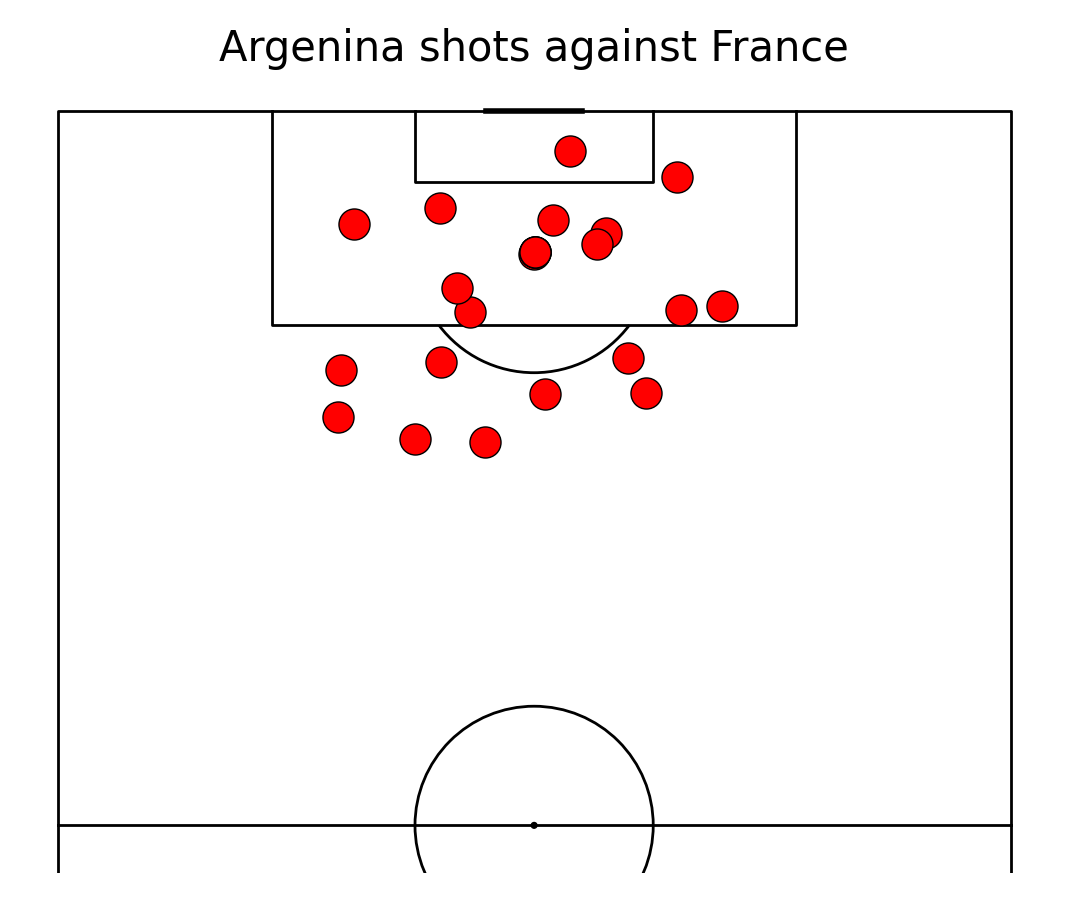

In [ ]:
from mplsoccer import VerticalPitch
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_argentina.x, df_argentina.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("Argenina shots against France", fontsize = 30)
plt.show()

# passes

In [ ]:
df['type_name'].unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt', 'Carry',
       'Pressure', 'Foul Committed', 'Foul Won', 'Ball Recovery', 'Block',
       'Miscontrol', 'Clearance', 'Duel', 'Interception', 'Dribble',
       'Shot', 'Goal Keeper', 'Dispossessed', 'Dribbled Past',
       'Injury Stoppage', 'Player Off', 'Player On', 'Offside',
       'Substitution', 'Tactical Shift', 'Shield', '50/50', 'Half End',
       'Bad Behaviour'], dtype=object)

In [ ]:
df['sub_type_name'].unique()

array([nan, 'Kick Off', 'Throw-in', 'Free Kick', 'Aerial Lost',
       'Recovery', 'Tackle', 'Open Play', 'Shot Saved', 'Interception',
       'Shot Faced', 'Corner', 'Handball', 'Keeper Sweeper', 'Goal Kick',
       'Penalty', 'Penalty Conceded', 'Goal Conceded', 'Collected',
       'Dive', 'Punch', 'Penalty Saved'], dtype=object)

filter the dataframe so that only passes are left  removing throw-ins.

In [ ]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

Plotting multiple pass maps on one figure

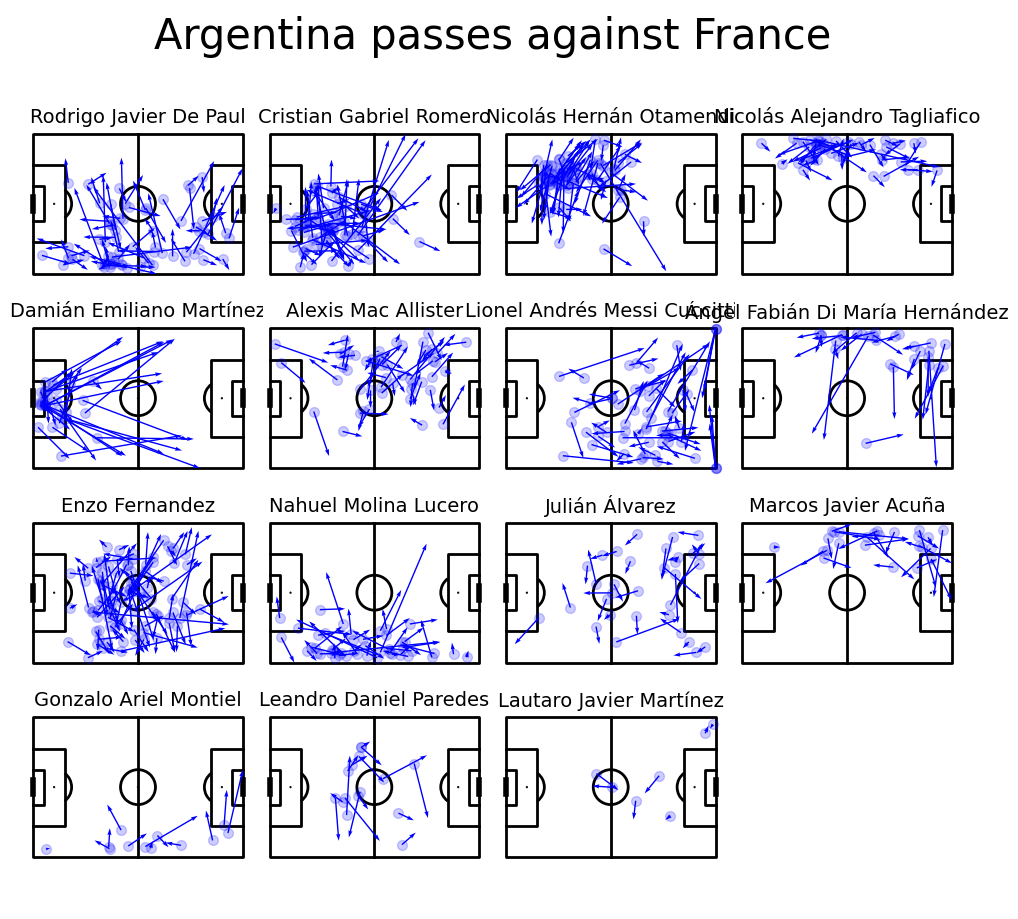

In [ ]:
#prepare the dataframe of passes by argentina that were no-throw ins
pass_mask_argentina = (df.type_name == 'Pass') & (df.team_name == "Argentina") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[pass_mask_argentina, ['x', 'y', 'end_x', 'end_y', 'player_name']]
#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, 'Argentina passes against France', ha='center', va='center', fontsize=30)
plt.show()

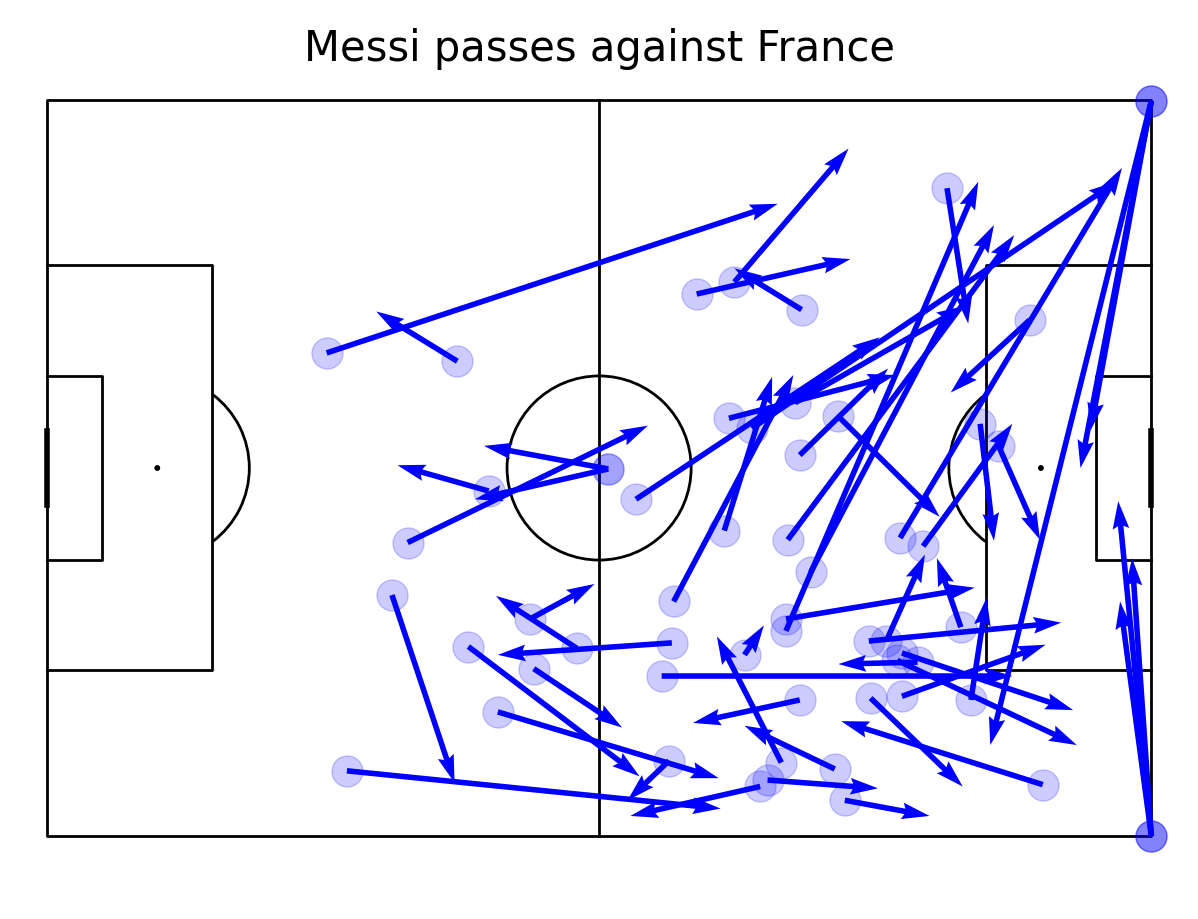

In [ ]:
mask_messi = (df.type_name == 'Pass') & (df.player_name == "Lionel Andrés Messi Cuccittini")
df_pass_messi = df.loc[mask_messi, ['x', 'y', 'end_x', 'end_y']]

pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.arrows(df_pass_messi.x, df_pass_messi.y,
            df_pass_messi.end_x, df_pass_messi.end_y, color = "blue", ax=ax['pitch'])
pitch.scatter(df_pass_messi.x, df_pass_messi.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])
fig.suptitle("Messi passes against France", fontsize = 30)
plt.show()